# Titanic Dataset Visualizations

## Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data

In [5]:
#Import the data
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Make a copy of the original dataframe
df_orig = df.copy()

In [7]:
#Remove unnessecary columns
df = df.drop(columns=['SibSp', 'Parch', 'Ticket', 'Cabin'])

In [8]:
#Rename columns
df = df.rename(columns = {'Pclass':'Class'})

In [9]:
#Engineer a new string-based feature
df['Survival'] = np.where(df['Survived'] == 0, 'No', 'Yes')
df.head()

,PassengerId,Survived,Class,Name,Sex,Age,Fare,Embarked,Survival
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,No


In [10]:
#Create a 'bad' dataframe (without 3rd class passengers)
dfBad = df[df['Class'] <= 2]
dfBad.head()

,PassengerId,Survived,Class,Name,Sex,Age,Fare,Embarked,Survival
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,S,No
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,C,Yes
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,26.5500,S,Yes


In [11]:
#Create another 'bad' dataframe (without female passengers)
dfBad2 = df[df['Sex'] == 'male']
dfBad2.head()

,PassengerId,Survived,Class,Name,Sex,Age,Fare,Embarked,Survival
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,No
5,6,0,3,"Moran, Mr. James",male,NaN,8.4583,Q,No
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,S,No
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,S,No


## Good Visualizations

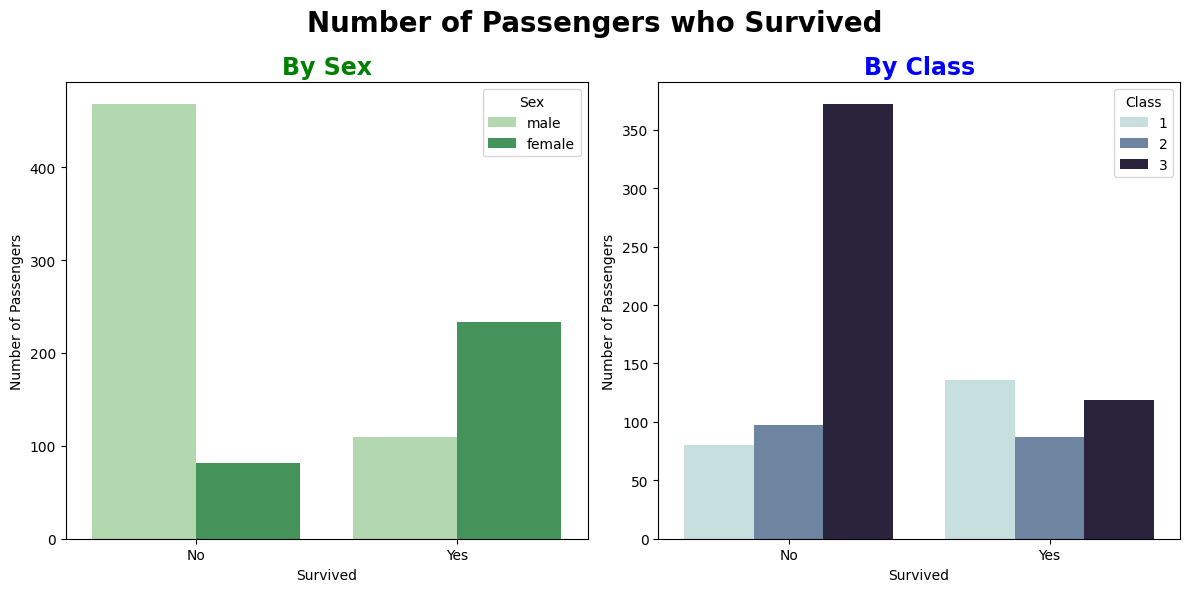

In [13]:
#Two subplots on same row
plt.figure(figsize = (12, 6))
plt.suptitle("Number of Passengers who Survived", fontweight = 'bold', fontsize = '20')

#1st
plt.subplot(121)
sns.countplot(x = "Survival", hue = "Sex", data = df, palette = "Greens")
plt.title('By Sex', fontweight = 'bold', color = 'green', fontsize = '17', horizontalalignment = 'center')
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")

#2nd
plt.subplot(122)
sns.countplot(x = "Survival", hue = "Class", data = df, palette = "ch:start=.2,rot=-.3")
plt.title('By Class', fontweight = 'bold', color = 'blue', fontsize = '17', horizontalalignment = 'center')
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")

plt.tight_layout()
plt.show()

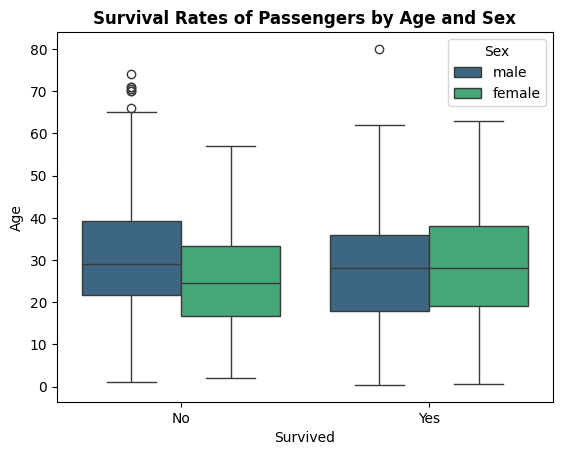

In [14]:
sns.boxplot(x = "Survival", y = "Age", hue = "Sex", palette = "viridis", data = df)
plt.title("Survival Rates of Passengers by Age and Sex", fontweight = 'bold')
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

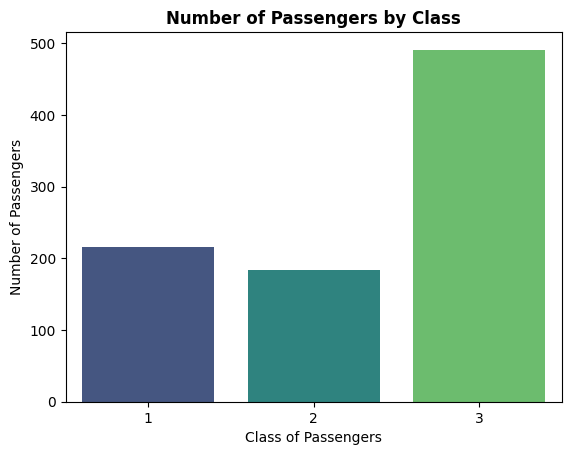

In [15]:
sns.countplot(x = "Class", data = df, palette = "viridis")
plt.title("Number of Passengers by Class", fontweight = 'bold')
plt.xlabel("Class of Passengers")
plt.ylabel("Number of Passengers")
plt.show()

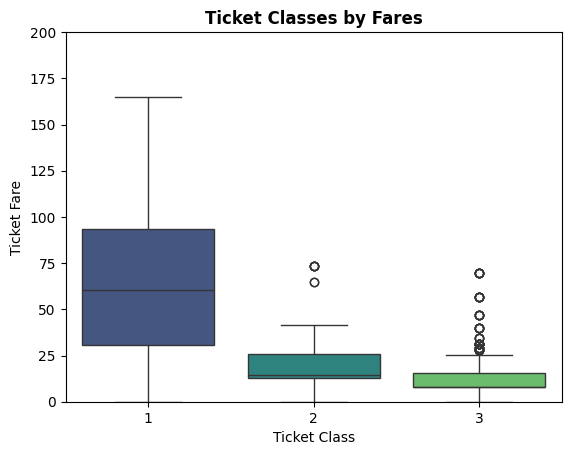

In [16]:
sns.boxplot(x = "Class", y = "Fare", data = df, palette = "viridis")
plt.title("Ticket Classes by Fares", fontweight = 'bold')
plt.xlabel("Ticket Class")
plt.ylabel("Ticket Fare")
plt.ylim(0, 200)
plt.show()

## Bad Visualizations

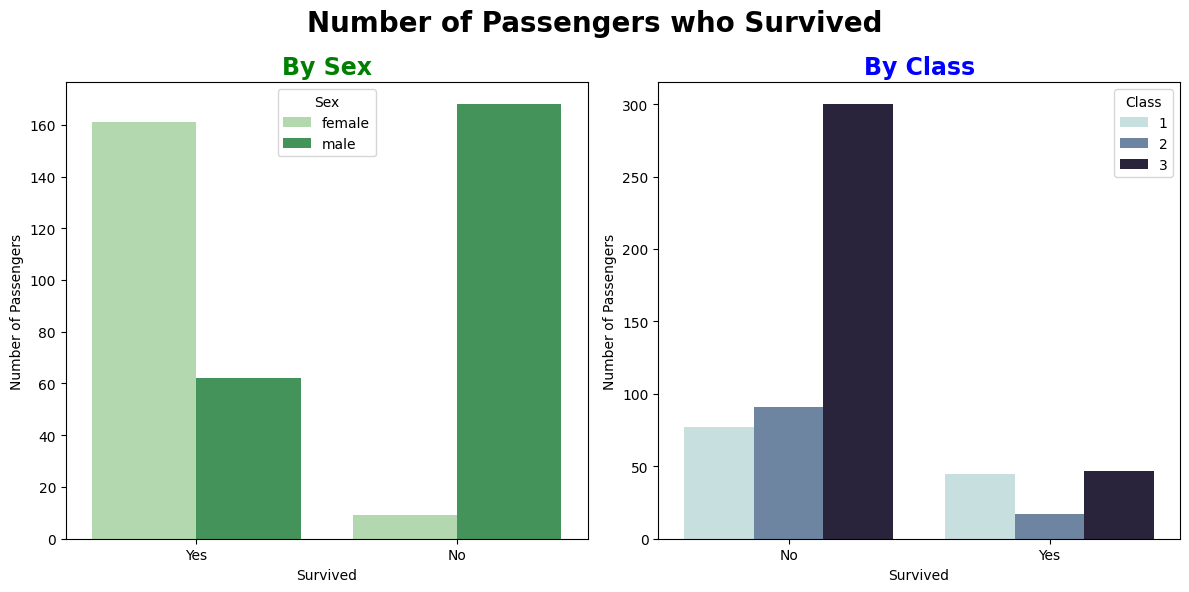

In [18]:
#Two subplots on same row
plt.figure(figsize = (12, 6))
plt.suptitle("Number of Passengers who Survived", fontweight = 'bold', fontsize = '20')

#1st
plt.subplot(121)
sns.countplot(x = "Survival", hue = "Sex", data = dfBad, palette = "Greens")
plt.title('By Sex', fontweight = 'bold', color = 'green', fontsize = '17', horizontalalignment = 'center')
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")

#2nd
plt.subplot(122)
sns.countplot(x = "Survival", hue = "Class", data = dfBad2, palette = "ch:start=.2,rot=-.3")
plt.title('By Class', fontweight = 'bold', color = 'blue', fontsize = '17', horizontalalignment = 'center')
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")

plt.tight_layout()
plt.show()

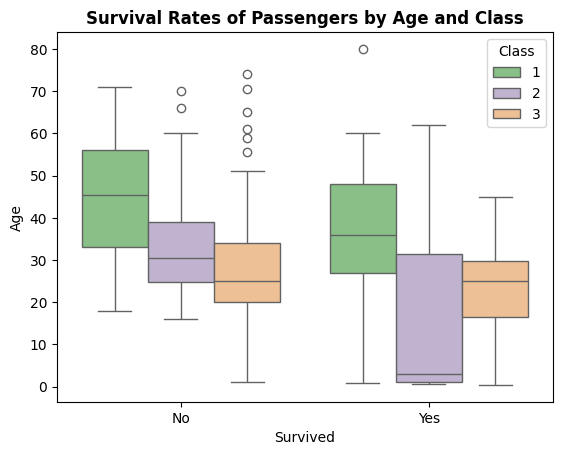

In [19]:
sns.boxplot(x = "Survival", y = "Age", hue = "Class", palette = "Accent", data = dfBad2)
plt.title("Survival Rates of Passengers by Age and Class", fontweight = 'bold')
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

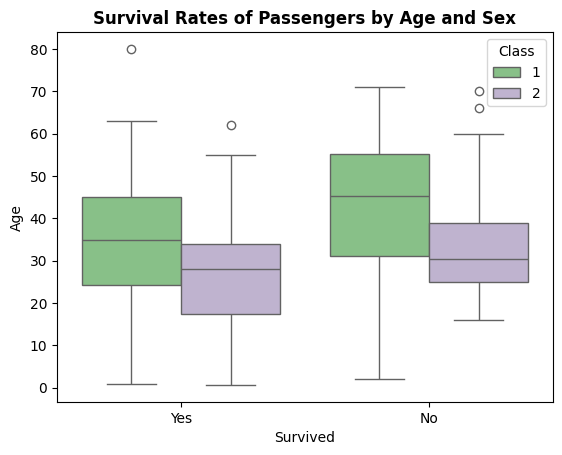

In [20]:
sns.boxplot(x = "Survival", y = "Age", hue = "Class", palette = "Accent", data = dfBad)
plt.title("Survival Rates of Passengers by Age and Sex", fontweight = 'bold')
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

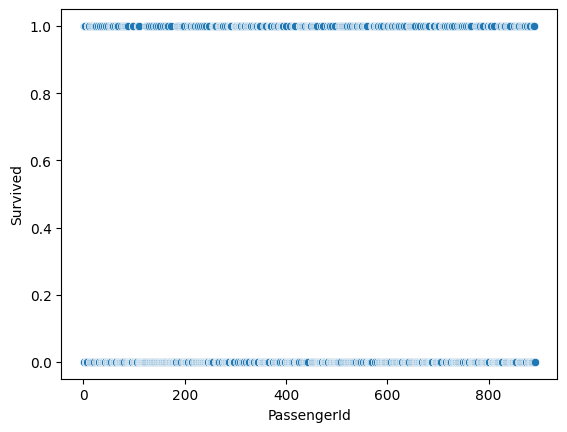

In [21]:
sns.scatterplot(x = 'PassengerId', y = 'Survived', data = df)
plt.show()